In [185]:
import pandas as pd
import numpy as np

In [197]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


tells how many times each category appears

In [199]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [200]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [201]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [202]:
df.stops = pd.factorize(df.stops)[0]

To understand trip length distribution

In [203]:
df['duration'].min()

np.float64(0.83)

In [204]:
df['duration'].max()

np.float64(49.83)

In [205]:
df['duration'].median()

np.float64(11.25)

Drop unnecessary columns

In [206]:
df = df.drop(columns=['Unnamed: 0',"flight"],axis=1)

Convert class column

In [207]:
df['class'] = df['class'].apply(lambda x:1 if x == 'Business' else 0)

In [208]:
df.stops = pd.factorize(df.stops)[0]

In [209]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


Apply one-hot encoding    
Converts categorical columns to 0/1 columns

In [210]:
df = pd.get_dummies(df, columns=['airline', 'source_city', 'destination_city', 'arrival_time', 'departure_time'], drop_first=True)

In [211]:
df

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,0,0,2.17,1,5956,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X = df.drop("price",axis=1)
y = df[["price"]]

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

Build Random Forest Model  
Random Forest powerful regression algorithm

In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

c:\Users\Nilesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [223]:
y_pred = model.predict(X_test)

In [224]:
model.score(X_test,y_test)

0.985436310562797

In [225]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [226]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1072.7386519709585


In [227]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 7481319.907262875


In [228]:
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 2735.2001585373737


In [229]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2):", r2)

R-squared Score (R2): 0.985436310562797


In [232]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'prediction vs actual price')

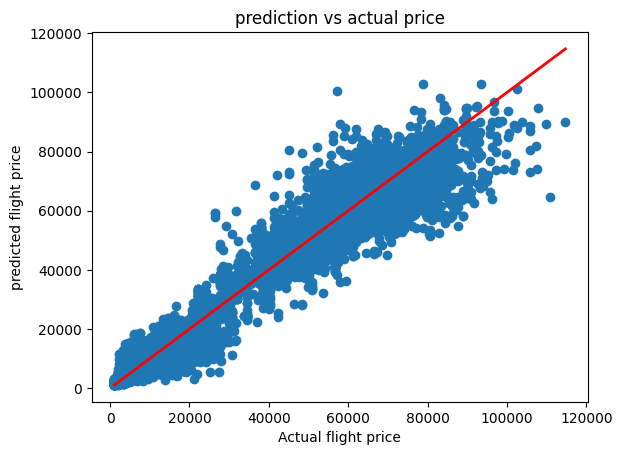

In [247]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("Actual flight price")
plt.ylabel("predicted flight price")
plt.title("prediction vs actual price")


 This visualization shows how well the model predicts flight prices.         
 The blue points represent actual vs predicted values, and the red line represents perfect prediction.        
 Most points lie close to the red line, which means the model performance is good.     
 Points far from the red line indicate prediction errors or outliers.    
 

In [246]:
import joblib

joblib.dump(model, "flight_price_model.pkl")


['flight_price_model.pkl']